Data Types:
 Daily / Cumulative            object
Indicator                     object
Date                  datetime64[ns]
Event                         object
region                        object
City                          object
Cases                         object
dtype: object


Data info:
 <bound method DataFrame.info of      Daily / Cumulative    Indicator       Date                   Event  \
0                 Daily        Cases 2020-03-02  First case of COVID-19   
1                 Daily        Cases 2020-03-04        Umrah suspension   
2                 Daily        Cases 2020-03-07                     NaN   
3                 Daily        Cases 2020-03-08                     NaN   
4                 Daily        Cases 2020-03-10                     NaN   
...                 ...          ...        ...                     ...   
1269              Daily  Mortalities 2020-06-13                     NaN   
1270              Daily  Mortalities 2020-06-13                     

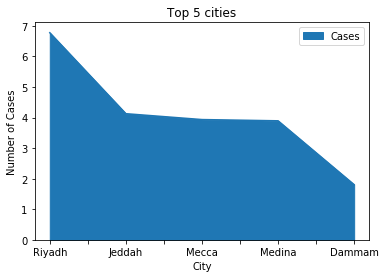

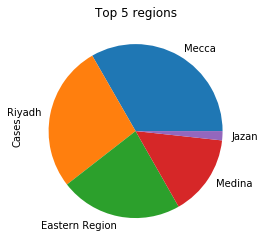

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pPic
import statistics

#read the data file
url = 'SA-COVID19.xlsx'
Data = pd.read_excel(url, sheet_name='Sheet', skipfooter=29599)


#show data types
print("Data Types:\n",Data.dtypes)


#show some details for data
print("\n\nData info:\n",Data.info)
print("\n\nData describe:\n",Data.describe())
#print("Data shape",Data.shape)


#drop unused columns
Data.drop(["Daily / Cumulative", "Event"], axis=1, inplace=True)
#print (Data.columns.values)


#replace ? character to 1
#print(Data.head(15))
Data["Cases"].replace('?', 1, inplace=True)
#print(Data.head(15))


#to delet all raws that have 'Total' values
Data["City"].replace('Total', np.nan, inplace=True)
Data.dropna(subset=["City"], axis=0, inplace=True)


#applying some statistics methods on 'cases'
st_cases=statistics.median(Data["Cases"])
print("\n\nMedian for cases: ",st_cases)
st_cases=statistics.mean(Data["Cases"])
print("Mean for cases: ",st_cases)
st_cases=statistics.mode(Data["Cases"])
print("Mode for cases: ",st_cases)


#Data Binning
bins = np.linspace(min(Data["Cases"]),max(Data["Cases"]), 4)
group_names = ["low", "Medium", "High"]
Data["BTotal"]=pd.cut(Data["Cases"], bins, labels=group_names, include_lowest=True)


#
#pd.get_dummies(Data["City"])


#Descriptive Statistics
print("\n\nDescriptive Statistics:\n")
Indicator_details= Data["Indicator"].value_counts()
Indicator_details.rename(index={"Indicator": "Indicator-details"}, inplace = True)
Indicator_details.index.name = 'Indicator'
print(Indicator_details)


#Grouping Data
print("\n\nGrouping Data:\n")
Group_By = Data[["Indicator", "region", "Cases"]]
Group_By_Test = Group_By.groupby(["Indicator", "region"],as_index = False).mean()
Piovt_Table = Group_By_Test.pivot(index = "Indicator", columns = "region")
print(Piovt_Table)


#normalization
#Simple Feature Scaling
Data["Cases"] = Data["Cases"] / Data["Cases"].max()
#z-score 
#Data["Cases"] = (Data["Cases"] - Data["Cases"].mean())/Data["Cases"].std()


#save file
Data.to_excel (r'C:\Users\salwa\Desktop\Untitled Folder\export_dataframe.xlsx', index = False, header=True)


################################################
##############virtualization####################

#area plot
Data = pd.read_excel("export_dataframe.xlsx")

ax=Data.sort_values(['Cases']).groupby(Data["City"]).sum().sort_values(by=['Cases'],
                      axis=0,
                      ascending=False,
                      inplace=False,
                      kind='quicksort',
                      na_position='last')

ax = ax.head(5)#.transpose() 
ax.plot(kind = 'area')


pPic.title('Top 5 cities')
#number of cases after appling #Simple Feature Scaling on it
pPic.ylabel('Number of Cases')
pPic.xlabel('City')
pPic.show()



#pie chart
ax=Data.sort_values(['Cases']).groupby(Data["region"]).sum().sort_values(by=['Cases'],
                      axis=0,
                      ascending=False,
                      inplace=False,
                      kind='quicksort',
                      na_position='last')

ax = ax.head(5)#.transpose()
ax["Cases"].plot(kind = 'pie')

pPic.title('Top 5 regions')
pPic.show()


